In [3664]:
#StudentCourseData_Report10.csv -- Dataset

In [3885]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
import dash
import dash_html_components as html
import dash_core_components as dcc
import dash.dependencies
from dash.dependencies import Input, Output, State
import dash_daq as daq
import dash_table as dt
import dash_bootstrap_components as dbc
import plotly
import base64
import plotly.graph_objs as go
import networkx as nx
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.tools as tls
import dash_cytoscape as cyto
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from matplotlib_venn import venn3, venn3_circles,venn2,venn2_circles
from matplotlib import pyplot as plt
from surprise import SVD, accuracy,Dataset
from surprise.reader import Reader
from surprise.model_selection import cross_validate,train_test_split
from surprise import SVD,SVDpp,SlopeOne,NMF,NormalPredictor,KNNBaseline,KNNBasic,KNNWithMeans,KNNWithZScore,BaselineOnly,CoClustering

In [3886]:
df=pd.read_csv('StudentCourseData_Report (5).csv')

In [3887]:
df.to_csv('studdata1.csv',header=False, index=False)

In [3888]:
df_t=pd.read_csv('studdata1.csv')

In [3889]:
df_t.head(3)

,Advanced Image Synthesis,Advanced Web Technologies,Cloud Web & Mobile,Cognitive Robot Systems,Computer Robot Vision,Computer Graphics,Gestaltung interaktiver Lehr-/Lern-Systeme,Development of Safe and Secure Software,Digital Games Research,Distributed Systems,...,Natural-Language-based Human-Computer Interaction,Neurocomputing and Organic Computing,Pattern and Component based Software Development,Peer-to-Peer Systems,Recommender Systems,Scientific Visualization,Test and Reliability of Digital Systems,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,"Semester:2,Grade:B,Rating:2","Semester:1,Grade:B,Rating:2",NaN,NaN,NaN,NaN,NaN,"Semester:1,Grade:C,Rating:3",NaN,"Semester:1,Grade:C,Rating:3",...,NaN,NaN,NaN,"Semester:3,Grade:C,Rating:3",NaN,NaN,NaN,15-Jan-2020 02:53:09,NaN,anil4frds@gmail.com
1,NaN,"Semester:3,Grade:B,Rating:1","Semester:3,Grade:C,Rating:3","Semester:1,Grade:C,Rating:2",NaN,NaN,"Semester:4,Grade:B,Rating:4","Semester:2,Grade:B,Rating:3",NaN,"Semester:1,Grade:C,Rating:3",...,NaN,NaN,NaN,"Semester:2,Grade:B,Rating:3",NaN,NaN,NaN,14-Jan-2020 10:30:59,NaN,anil4frds@gmail.com
2,NaN,NaN,NaN,NaN,NaN,NaN,"Semester:2,Grade:D,Rating:1",NaN,NaN,"Semester:1,Grade:D,Rating:2",...,NaN,NaN,NaN,NaN,"Semester:2,Grade:D,Rating:2",NaN,NaN,14-Jan-2020 09:13:34,NaN,anil4frds@gmail.com


In [3890]:
df_t.drop(['Unnamed: 31','Unnamed: 32','Unnamed: 33'],axis=1,inplace=True)

In [3891]:
df_tt=df_t.reset_index()

In [3892]:
dfrslt=(df_tt.set_index('index')
         .fillna('Semester,Grade,Rating')
         .stack()
         .str.split(',|;', expand=True)
         .stack()
         .str.split(':', expand=True)
         .reset_index(level=2, drop=True)
         .set_index(0, append=True)[1]
         .unstack()
         .rename_axis(('id','sub'))
         .rename_axis(None, axis=1)
         .reset_index()
         )

In [3893]:
dfrslt=dfrslt.mask(dfrslt.isna(), np.nan)

In [3894]:
dfrslt.rename(columns={'Semester':'semester','Grade':'grade','Rating':'rating'},inplace=True)

In [3895]:
dfrslt.head(10)

,id,sub,grade,rating,semester
0,0,Advanced Image Synthesis,B,2,2
1,0,Advanced Web Technologies,B,2,1
2,0,Cloud Web & Mobile,NaN,NaN,NaN
3,0,Cognitive Robot Systems,NaN,NaN,NaN
4,0,Computer Graphics,NaN,NaN,NaN
5,0,Computer Robot Vision,NaN,NaN,NaN
6,0,Development of Safe and Secure Software,C,3,1
7,0,Digital Games Research,NaN,NaN,NaN
8,0,Distributed Systems,C,3,1
9,0,Electronic Communities and Social Networks,NaN,NaN,NaN


In [3896]:
dfrslt_nan=dfrslt.dropna(thresh=3, axis=0)

In [4196]:
set(list(dfrslt_nan[dfrslt_nan['grade']=='A']['sub'].values))

{'Advanced Web Technologies',
 'Electronic Communities and Social Networks',
 'Gestaltung interaktiver Lehr-/Lern-Systeme',
 'Information Mining',
 'Information Retrieval',
 'Interaktive Systeme',
 'Learning Analytics',
 'Recommender Systems'}

In [4197]:
seta=set(list(dfrslt_nan[dfrslt_nan['grade']=='A']['sub'].values))
setb=set(list(dfrslt_nan[dfrslt_nan['grade']=='B']['sub'].values))
setc=set(list(dfrslt_nan[dfrslt_nan['grade']=='C']['sub'].values))
setd=set(list(dfrslt_nan[dfrslt_nan['grade']=='D']['sub'].values))
sete=set(list(dfrslt_nan[dfrslt_nan['grade']=='E']['sub'].values))
setf=set(list(dfrslt_nan[dfrslt_nan['grade']=='F']['sub'].values))

In [4198]:
setbest=seta.intersection(setb)
setworst=sete.intersection(setf)

In [4199]:
setr1=set(list(dfrslt_nan[dfrslt_nan['rating']=='1']['sub'].values))
setr2=set(list(dfrslt_nan[dfrslt_nan['rating']=='2']['sub'].values))
setr3=set(list(dfrslt_nan[dfrslt_nan['rating']=='3']['sub'].values))
setr4=set(list(dfrslt_nan[dfrslt_nan['rating']=='4']['sub'].values))
setr5=set(list(dfrslt_nan[dfrslt_nan['rating']=='5']['sub'].values))

In [4200]:
setgoodr=setr1.intersection(setr2)
setbadrat=setr4.intersection(setr5)

In [4201]:
v1=setgoodr.intersection(setbest)
v2=setbadrat.intersection(setworst)
v3=setbadrat.intersection(setbest)
v4=setgoodr.intersection(setworst)

#### Good Grade vs Good Ratings

TypeError: 'str' object is not callable

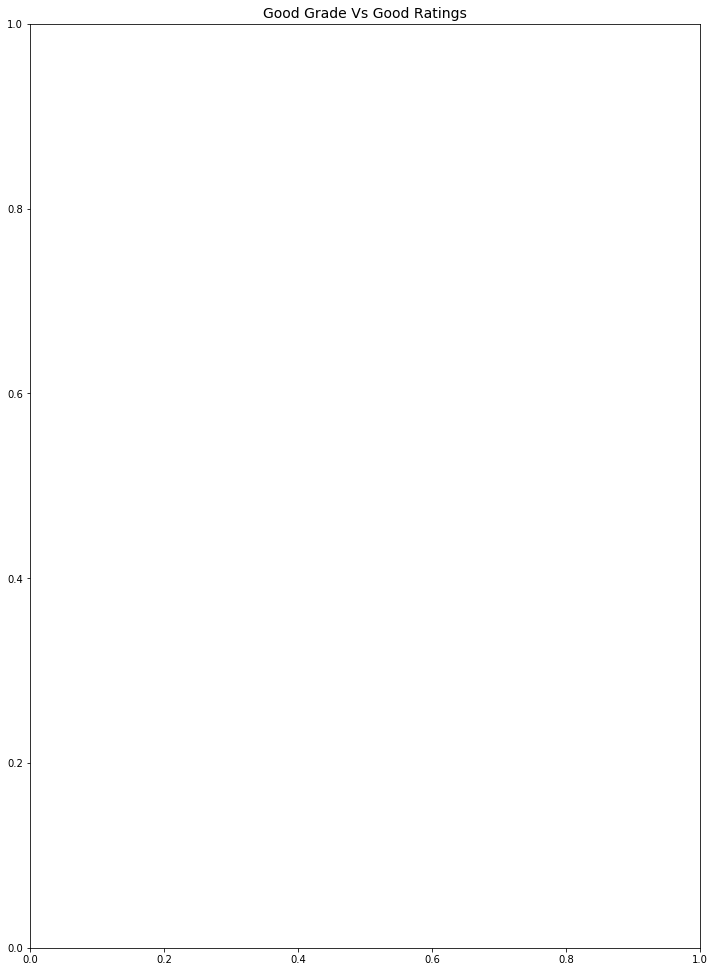

In [4205]:
# setup the figure

fig, ax = plt.subplots(figsize = (12,17))
ax.set_title("Good Grade Vs Good Ratings", fontsize=14)
# make the venn diagram
v = venn2([setgoodr, setbest],set_labels=["Good Ratings", "Good Grades"],alpha=1)
# adjust labels from counts to names
v.get_label_by_id('10').set_text('\n'.join(setgoodr))
v.get_label_by_id('01').set_text('\n'.join(setbest))
v.get_label_by_id('11').set_text('\n'.join(v1))
# add circle outlines
c = venn2_circles([setgoodr, setbest],
                  linestyle='solid')
venn2_circles([setgoodr, setbest], linestyle='dashed', linewidth=1, color="grey")
c[0].set_color('lightgreen')
c[1].set_color('skyblue')


plt.savefig('GGGR.png')

#### Bad grades Vs Bad Ratings

TypeError: 'str' object is not callable

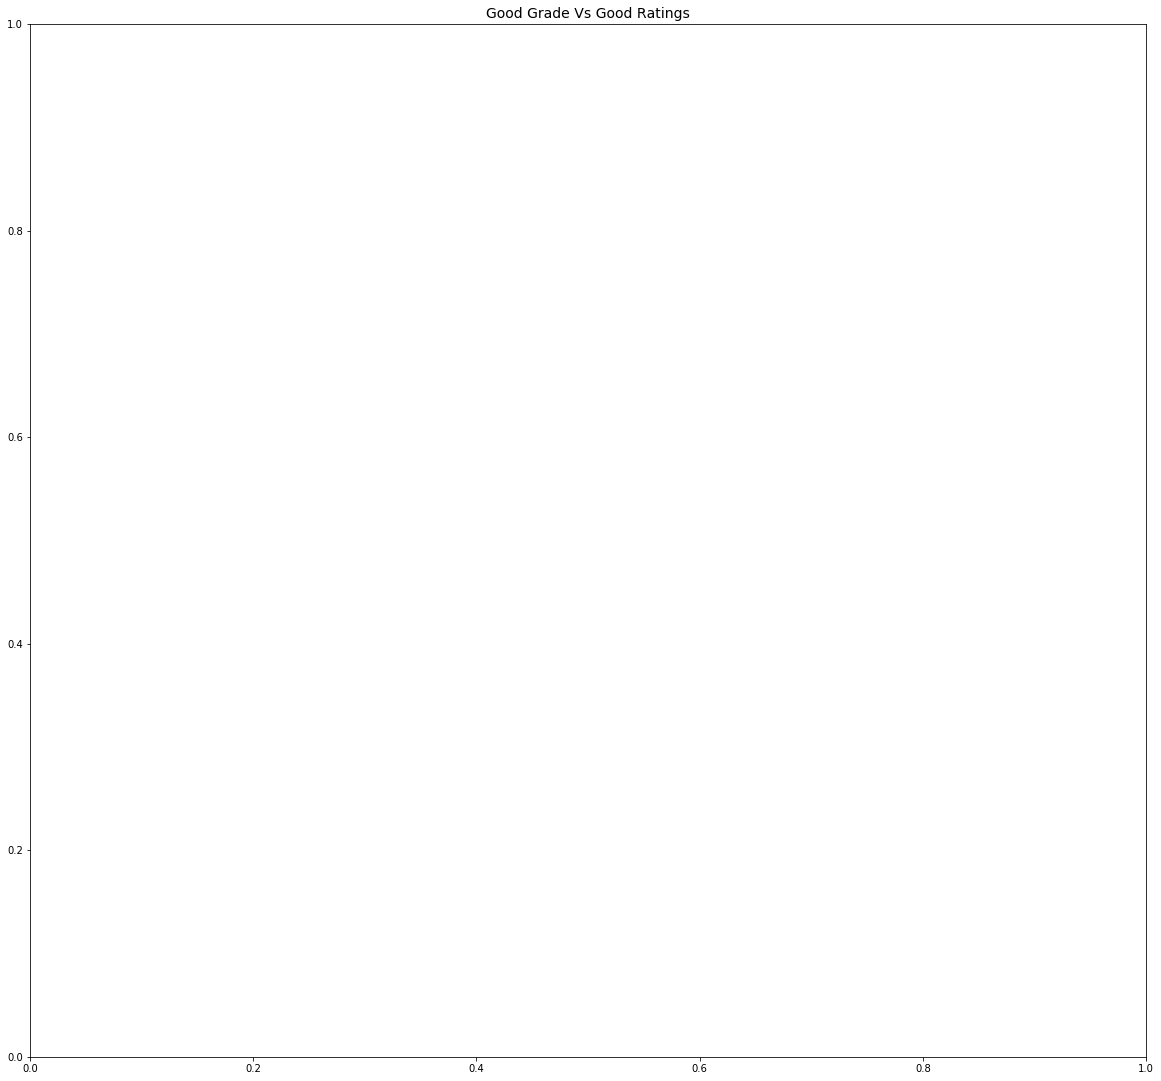

In [4191]:
# setup the figure

figa1, axa1 = plt.subplots(figsize = (20,19))
axa1.set_title("Good Grade Vs Good Ratings", fontsize=14)
# make the venn diagram
va = venn2([setbadrat, setworst],set_labels=["Bad Ratings", "Bad Grades"])
# adjust labels from counts to names
va.get_label_by_id('10').set_text('\n'.join(setbadrat))
va.get_label_by_id('01').set_text('\n'.join(setworst))
va.get_label_by_id('11').set_text('\n'.join(v2))
# add circle outlines
ca = venn2_circles([setbadrat, setworst],
                  linestyle='solid')
venn2_circles([setbadrat, setworst], linestyle='dashed', linewidth=1, color="grey")

ca[0].set_color('green')
ca[1].set_color('skyblue')
# for text in va.set_labels:
#     text.set_fontsize(14)

plt.savefig('BGBR.png')

TypeError: 'str' object is not callable

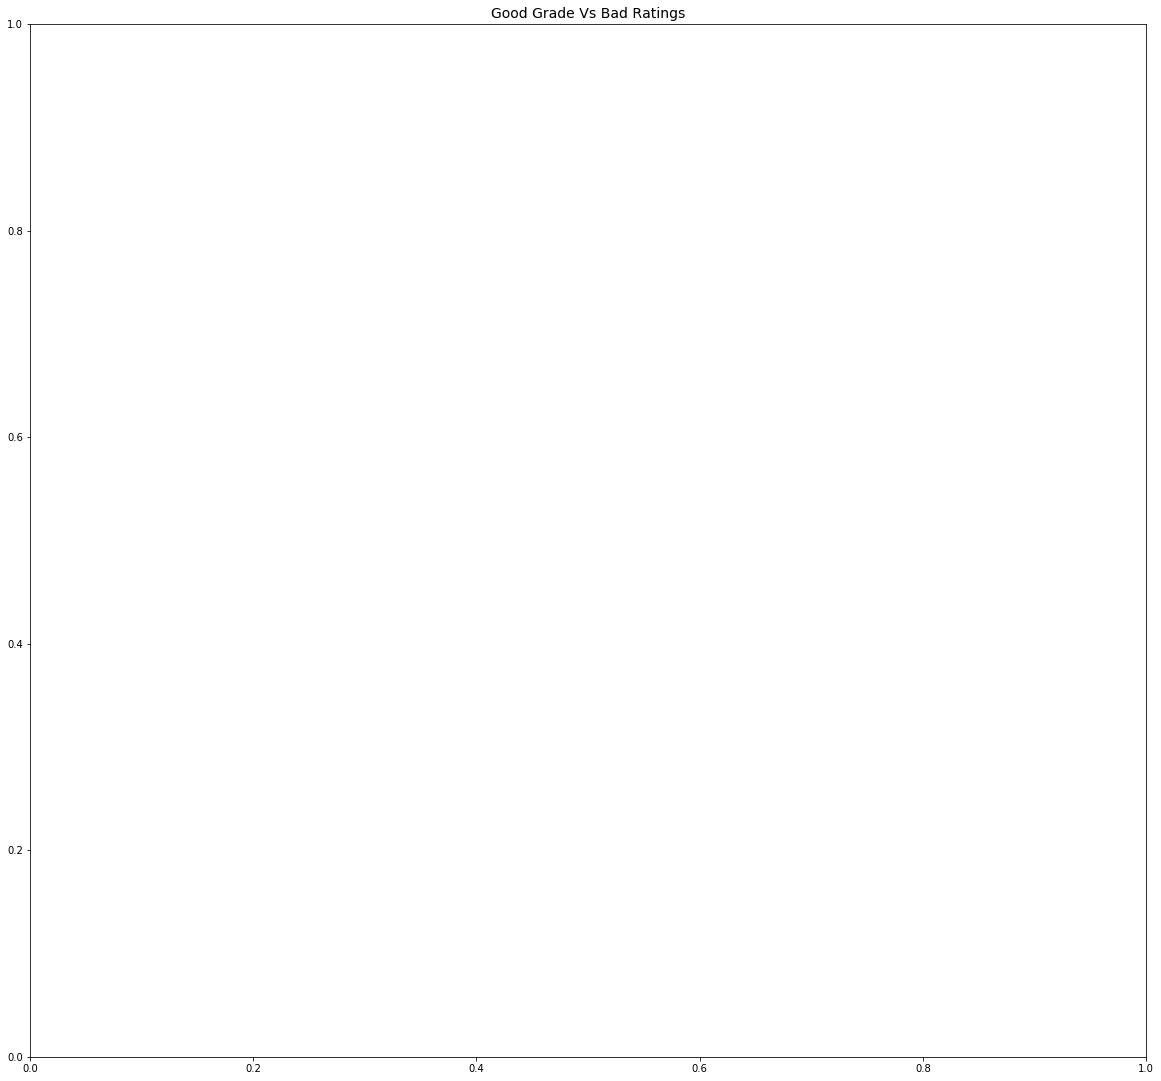

In [4194]:
# setup the figure

figa2, axa2 = plt.subplots(figsize = (20,19))
axa2.set_title("Good Grade Vs Bad Ratings", fontsize=14)
# make the venn diagram
vb = venn2([setbadrat, setbest],
          set_labels=["Bad Ratings", "Good Grades"])
# adjust labels from counts to names
vb.get_label_by_id('10').set_text('\n'.join(setbadrat))
vb.get_label_by_id('01').set_text('\n'.join(setbest))
vb.get_label_by_id('11').set_text('\n'.join(v3))
# add circle outlines
cb = venn2_circles([setbadrat, setbest],
                  linestyle='solid')
venn2_circles([setbadrat, setbest], linestyle='dashed', linewidth=1, color="grey")

cb[0].set_color('green')
cb[1].set_color('skyblue')

for text in out.set_labels:
    text.set_fontsize(14)
plt.savefig('GGBR.png')

TypeError: 'str' object is not callable

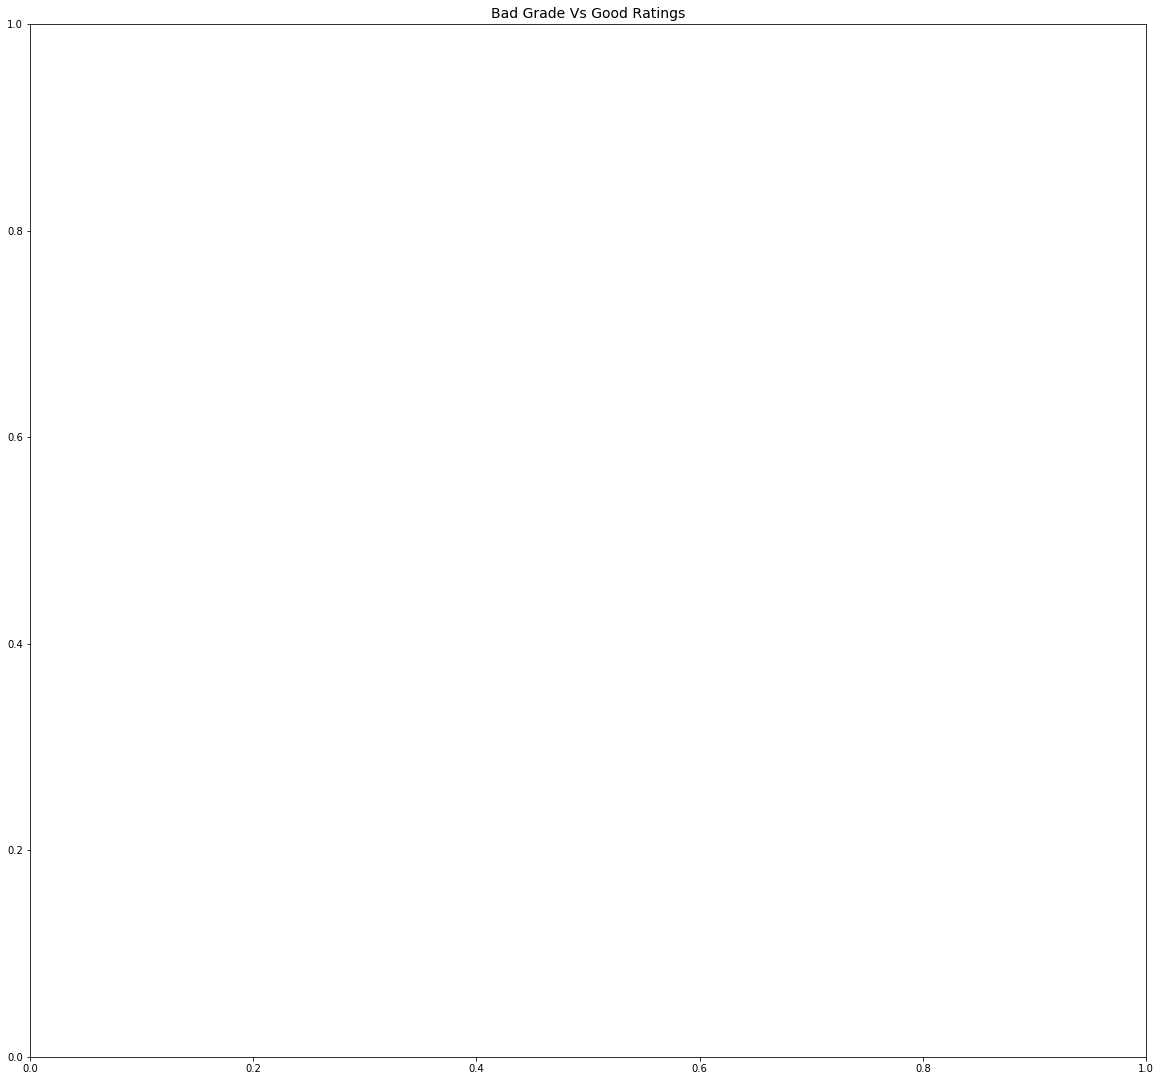

In [4195]:
# setup the figure

figa3, axa3 = plt.subplots(figsize = (20,19))
axa3.set_title("Bad Grade Vs Good Ratings", fontsize=14)
# make the venn diagram
vc = venn2([setgoodr, setworst],
          set_labels=["Good Ratings", "Bad Grades"])
# adjust labels from counts to names
vc.get_label_by_id('10').set_text('\n'.join(setgoodr))
vc.get_label_by_id('01').set_text('\n'.join(setworst))
try:
    vc.get_label_by_id('11').set_text('\n'.join(v4))
except:
    print('No common values')
# add circle outlines
cc = venn2_circles([setgoodr, setworst],
                  linestyle='solid')
venn2_circles([setgoodr, setworst], linestyle='dashed', linewidth=1, color="grey")

cc[0].set_color('green')
cc[1].set_color('skyblue')


plt.savefig('BGGR.png')

In [3907]:
data_sets = {'Good Grade':[list(v1),list(v3)],'Bad Grade':[list(v4),list(v2)]}

In [3908]:
df_sets=pd.DataFrame(data_sets, index =['Good Rating', 'Bad Rating']) 

In [3909]:
df_sets=df_sets.reset_index()

In [3910]:
df_sets.rename(columns = {'index':'Rating'}, inplace = True) 

In [3911]:
df_sets

,Rating,Good Grade,Bad Grade
0,Good Rating,"[Interaktive Systeme, Information Retrieval, R...",[]
1,Bad Rating,"[Recommender Systems, Gestaltung interaktiver ...",[Formal Specification of Software Systems]


In [3912]:
# df_sets['Good Grade']=df_sets['Good Grade'].astype(str)
# df_sets['Bad Grade']=df_sets['Good Grade'].astype(str)

In [3913]:
df_sets

,Rating,Good Grade,Bad Grade
0,Good Rating,"[Interaktive Systeme, Information Retrieval, R...",[]
1,Bad Rating,"[Recommender Systems, Gestaltung interaktiver ...",[Formal Specification of Software Systems]


In [3914]:
dfrslt_nan.groupby(['id','grade']).sub.apply(list)

id  grade
0   B        [Advanced Image Synthesis, Advanced Web Techno...
    C        [Development of Safe and Secure Software, Dist...
1   B        [Advanced Web Technologies, Development of Saf...
    C        [Cloud Web & Mobile, Cognitive Robot Systems, ...
    D             [Electronic Communities and Social Networks]
2   A                                    [Interaktive Systeme]
    C        [Electronic Communities and Social Networks, I...
    D        [Distributed Systems, Gestaltung interaktiver ...
    E               [Formal Specification of Software Systems]
3   B             [Electronic Communities and Social Networks]
    C        [Gestaltung interaktiver Lehr-/Lern-Systeme, I...
    D              [Distributed Systems, Peer-to-Peer Systems]
4   B                                    [Distributed Systems]
    C        [Internet of Things- Protocols and System Soft...
    F                [Test and Reliability of Digital Systems]
5   A                              [Advanced 

In [3915]:
df_subs1=dfrslt_nan.drop(['semester','grade','rating'],axis=1)

In [3916]:
df_final=dfrslt_nan.assign(count=dfrslt_nan.groupby(['id','semester']).cumcount()).pivot_table(index = ['id','count'],columns = 'semester',
                        values = 'sub',aggfunc = ''.join).rename_axis(columns = None,index = [None,None])

In [3917]:
df_final.head(40)

1  \
0  0                          Advanced Web Technologies   
   1            Development of Safe and Secure Software   
   2                                Distributed Systems   
1  0                            Cognitive Robot Systems   
   1                                Distributed Systems   
   2                                                NaN   
   3                                                NaN   
   4                                                NaN   
2  0                                Distributed Systems   
   1         Electronic Communities and Social Networks   
   2           Formal Specification of Software Systems   
   3                            Information Engineering   
   4                                 Information Mining   
3  0                                Distributed Systems   
   1         Electronic Communities and Social Networks   
   2                                                NaN   
4  0  Internet of Things- Protocols and System Software   
   1                                                NaN   
5  0                                 Cloud Web & Mobile   
   1                              Computer Robot Vision   
   2                                Distributed Systems   
   3           Formal Specification of Software Systems   
   4                                                NaN   
6  0         Electronic Communities and Social Networks   
   1           Formal Specification of Software Systems   
   2                                 Learning Analytics   
7  0                                Recommender Systems   
8  0                           Advanced Image Synthesis   
   1                            Cognitive Robot Systems   
   2                              Computer Robot Vision   
   3                           Scientific Visualization   
   4                                                NaN   
9  0                             Digital Games Research   
   1                                Distributed Systems   
   2         Electronic Communities and Social Networks   
   3                                 Learning Analytics   
10 0                              Computer Robot Vision   
   1         Electronic Communities and Social Networks   
   2           Formal Specification of Software Systems   
11 0                                Distributed Systems   

                                                      2  \
0  0                           Advanced Image Synthesis   
   1                                 Learning Analytics   
   2                                                NaN   
1  0            Development of Safe and Secure Software   
   1                              Information Retrieval   
   2                               Peer-to-Peer Systems   
   3                                                NaN   
   4                                                NaN   
2  0         Gestaltung interaktiver Lehr-/Lern-Systeme   
   1                              Information Retrieval   
   2                                Interaktive Systeme   
   3  Internet of Things- Protocols and System Software   
   4                                Recommender Systems   
3  0         Gestaltung interaktiver Lehr-/Lern-Systeme   
   1                                Interaktive Systeme   
   2                               Peer-to-Peer Systems   
4  0                                Distributed Systems   
   1            Test and Reliability of Digital Systems   
5  0            Development of Safe and Secure Software   
   1                                Interaktive Systeme   
   2  Internet of Things- Protocols and System Software   
   3   Pattern and Component based Software Development   
   4                               Peer-to-Peer Systems   
6  0                          Advanced Web Technologies   
   1                                Interaktive Systeme   
   2                                                NaN   
7  0                                     

In [3918]:
df_final.to_csv('category1.csv')

In [3919]:
df_processed=df_subs1.groupby('id').sub.apply(list).reset_index()

In [3920]:
df_processed.head(5)

,id,sub
0,0,"[Advanced Image Synthesis, Advanced Web Techno..."
1,1,"[Advanced Web Technologies, Cloud Web & Mobile..."
2,2,"[Distributed Systems, Electronic Communities a..."
3,3,"[Distributed Systems, Electronic Communities a..."
4,4,"[Distributed Systems, Internet of Things- Prot..."


In [3921]:
df_processed.set_index('id',inplace=True)

In [3922]:
dataset=list(df_processed['sub'].values)

In [3923]:
#dfrslt_non=dfrslt_nan

In [3924]:
#dt_dum=list(dfrslt_non[['sub','grade']].values)

In [3925]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded

,Advanced Image Synthesis,Advanced Web Technologies,Cloud Web & Mobile,Cognitive Robot Systems,Computer Graphics,Computer Robot Vision,Development of Safe and Secure Software,Digital Games Research,Distributed Systems,Electronic Communities and Social Networks,...,Interaktive Systeme,Internet of Things- Protocols and System Software,Learning Analytics,Natural-Language-based Human-Computer Interaction,Neurocomputing and Organic Computing,Pattern and Component based Software Development,Peer-to-Peer Systems,Recommender Systems,Scientific Visualization,Test and Reliability of Digital Systems
0,True,True,False,False,False,False,True,False,True,False,...,False,False,True,False,False,False,True,False,False,False
1,False,True,True,True,False,False,True,False,True,True,...,False,False,True,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,True,True,True,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,True,...,True,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,True
5,False,True,True,False,False,True,True,False,True,False,...,True,True,False,False,False,True,True,False,False,False
6,False,True,False,False,False,False,False,False,False,True,...,True,False,True,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8,True,True,False,True,True,True,True,False,True,False,...,False,True,False,False,False,False,True,False,True,False
9,False,True,False,False,False,False,False,True,True,True,...,False,False,True,False,False,False,False,False,False,False


In [3926]:
#dfrslt_non.replace(np.nan,'None',inplace=True)

In [3927]:
# te1 = TransactionEncoder()
# te_ary1 = te1.fit(dt_dum).transform(dt_dum)
# df_encoded1 = pd.DataFrame(te_ary1, columns=te1.columns_)
# df_encoded1

In [3928]:
from mlxtend.frequent_patterns import apriori

apriori(df_encoded, min_support=0.45,use_colnames=True)

,support,itemsets
0,0.451613,(Advanced Web Technologies)
1,0.548387,(Distributed Systems)
2,0.451613,(Information Retrieval)


In [3929]:
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True,verbose=1)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

Processing 10 combinations | Sampling itemset size 10


,support,itemsets,length
0,0.129032,(Advanced Image Synthesis),1
1,0.451613,(Advanced Web Technologies),1
2,0.225806,(Cloud Web & Mobile),1
3,0.129032,(Cognitive Robot Systems),1
4,0.129032,(Computer Graphics),1
5,0.161290,(Computer Robot Vision),1
6,0.225806,(Development of Safe and Secure Software),1
7,0.064516,(Digital Games Research),1
8,0.548387,(Distributed Systems),1
9,0.419355,(Electronic Communities and Social Networks),1


In [3930]:
# frequent_itemsets1 = apriori(df_encoded1, min_support=0.005, use_colnames=True,verbose=1)
# frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
# frequent_itemsets1

In [3931]:
from mlxtend.frequent_patterns import association_rules

rules=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.1)

In [3932]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Advanced Web Technologies),(Advanced Image Synthesis),0.451613,0.129032,0.096774,0.214286,1.660714,0.038502,1.108504
1,(Advanced Image Synthesis),(Advanced Web Technologies),0.129032,0.451613,0.096774,0.750000,1.660714,0.038502,2.193548
2,(Advanced Image Synthesis),(Cognitive Robot Systems),0.129032,0.129032,0.064516,0.500000,3.875000,0.047867,1.741935
3,(Cognitive Robot Systems),(Advanced Image Synthesis),0.129032,0.129032,0.064516,0.500000,3.875000,0.047867,1.741935
4,(Advanced Image Synthesis),(Computer Graphics),0.129032,0.129032,0.064516,0.500000,3.875000,0.047867,1.741935


In [3933]:
from mlxtend.frequent_patterns import association_rules

rules1=association_rules(frequent_itemsets1,metric="confidence",min_threshold=0.001)

In [3934]:
rules1[rules1['confidence']>=max(rules1['confidence'])-0.6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(Interaktive Systeme),(A),0.058511,0.085106,0.026596,0.454545,5.340909,0.021616,1.677305
24,(Advanced Web Technologies),(B),0.074468,0.223404,0.031915,0.428571,1.918367,0.015278,1.359043
53,(Natural-Language-based Human-Computer Interac...,(B),0.005319,0.223404,0.005319,1.000000,4.476190,0.004131,inf
56,(Pattern and Component based Software Developm...,(B),0.010638,0.223404,0.005319,0.500000,2.238095,0.002943,1.553191
58,(Peer-to-Peer Systems),(B),0.058511,0.223404,0.026596,0.454545,2.034632,0.013524,1.423759
63,(Cloud Web & Mobile),(C),0.037234,0.345745,0.031915,0.857143,2.479121,0.019041,4.579787
65,(Cognitive Robot Systems),(C),0.021277,0.345745,0.015957,0.750000,2.169231,0.008601,2.617021
69,(Development of Safe and Secure Software),(C),0.037234,0.345745,0.015957,0.428571,1.239560,0.003084,1.144947
71,(Digital Games Research),(C),0.010638,0.345745,0.010638,1.000000,2.892308,0.006960,inf
75,(Electronic Communities and Social Networks),(C),0.069149,0.345745,0.037234,0.538462,1.557396,0.013326,1.417553


In [3935]:
l=[]
for i,j in zip(range(0,len(rules.iloc[:,0])),range(0,len(rules.iloc[:,1]))):
    itemset = set(rules.iloc[i,0]) | set(rules.iloc[i,1])
    l.append(tuple(itemset))

In [3936]:
len(l)

68160

In [3937]:
import functools
def reduce_concat(x, sep=""):
    return functools.reduce(lambda x, y: str(x) + sep + str(y), x)

def paste(*lists, sep=" ", collapse=None):
    result = map(lambda x: reduce_concat(x, sep=sep), zip(*lists))
    if collapse is not None:
        return reduce_concat(result, sep=collapse)
    return list(result)

In [3938]:
antecedents=[]
for i in range(0,len(rules.iloc[:,0])):
    antecedents.append(list(rules.iloc[i,0]))

In [3939]:
consequents=[]
for i in range(0,len(rules.iloc[:,1])):
    consequents.append(list(rules.iloc[i,1]))

In [3940]:
list_join=paste(antecedents, consequents, sep=',')

In [3941]:
df_join=pd.DataFrame(list_join)

In [3942]:
halfjoins=df_join[0].str.replace('[','')

In [3943]:
ohnequote=halfjoins.str.replace(']','')

In [3944]:
finalentry=ohnequote.str.replace("'","")

In [3945]:
newrules=rules.assign(itemsets=finalentry)

In [3946]:
max_support=newrules_up[newrules_up['confidence']==max(newrules_up['confidence'])]

In [3947]:
df_max_support=max_support[['support','confidence','itemsets1']]

In [3948]:
df_max_support=df_max_support[df_max_support['support']>=0.15]

In [3949]:
type(df_max_support['itemsets1'].values[0])

tuple

In [3950]:
df_maxrules1=max_support[['antecedents','consequents','support','confidence']]

In [3951]:
df_maxconf=df_maxrules1[df_maxrules1['support']>=0.15]

In [3952]:
df_maxconf['antecedents']=df_maxconf['antecedents'].astype(str)
df_maxconf['consequents']=df_maxconf['consequents'].astype(str)

In [3953]:
df_maxconf['antecedents'].values[0]

"frozenset({'Development of Safe and Secure Software', 'Distributed Systems'})"

In [3954]:
df_maxconf['antecedents'] = df_maxconf['antecedents'].apply(lambda x: x.replace('frozenset(',''))
df_maxconf['antecedents'] = df_maxconf['antecedents'].apply(lambda x: x.replace(')',''))
# df_maxconf['antecedents'] = df_maxconf['antecedents'].apply(lambda x: x.replace('{',''))
# df_maxconf['antecedents'] = df_maxconf['antecedents'].apply(lambda x: x.replace('}',''))
df_maxconf['antecedents'] = df_maxconf['antecedents'].apply(lambda x: x.replace("'",""))

In [3955]:
df_maxconf['antecedents'].values[0]

'{Development of Safe and Secure Software, Distributed Systems}'

In [3956]:
df_maxconf['consequents'] = df_maxconf['consequents'].apply(lambda x: x.replace('frozenset(',''))
df_maxconf['consequents'] = df_maxconf['consequents'].apply(lambda x: x.replace(')',''))
df_maxconf['consequents'] = df_maxconf['consequents'].apply(lambda x: x.replace("'",""))

In [3957]:
df_maxconf=df_maxconf[['antecedents','support','consequents']]

In [4269]:
categorical_dimensions = ['antecedents', 'consequents']

dimensions = [dict(values=df_maxconf[label], label=label) for label in categorical_dimensions]

# Build colorscale
# [aliceblue, antiquewhite, aqua, aquamarine, azure,
#             beige, bisque, black, blanchedalmond, blue,
#             blueviolet, brown, burlywood, cadetblue,
#             chartreuse, chocolate, coral, cornflowerblue,
#             cornsilk, crimson, cyan, darkblue, darkcyan,
#             darkgoldenrod, darkgray, darkgrey, darkgreen,
#             darkkhaki, darkmagenta, darkolivegreen, darkorange,
#             darkorchid, darkred, darksalmon, darkseagreen,
#             darkslateblue, darkslategray, darkslategrey,
#             darkturquoise, darkviolet, deeppink, deepskyblue,
#             dimgray, dimgrey, dodgerblue, firebrick,
#             floralwhite, forestgreen, fuchsia, gainsboro,
#             ghostwhite, gold, goldenrod, gray, grey, green,
#             greenyellow, honeydew, hotpink, indianred, indigo,
#             ivory, khaki, lavender, lavenderblush, lawngreen,
#             lemonchiffon, lightblue, lightcoral, lightcyan,
#             lightgoldenrodyellow, lightgray, lightgrey,
#             lightgreen, lightpink, lightsalmon, lightseagreen,
#             lightskyblue, lightslategray, lightslategrey,
#             lightsteelblue, lightyellow, lime, limegreen,
#             linen, magenta, maroon, mediumaquamarine,
#             mediumblue, mediumorchid, mediumpurple,
#             mediumseagreen, mediumslateblue, mediumspringgreen,
#             mediumturquoise, mediumvioletred, midnightblue,
#             mintcream, mistyrose, moccasin, navajowhite, navy,
#             oldlace, olive, olivedrab, orange, orangered,
#             orchid, palegoldenrod, palegreen, paleturquoise,
#             palevioletred, papayawhip, peachpuff, peru, pink,
#             plum, powderblue, purple, red, rosybrown,
#             royalblue, rebeccapurple, saddlebrown, salmon,
#             sandybrown, seagreen, seashell, sienna, silver,
#             skyblue, slateblue, slategray, slategrey, snow,
#             springgreen, steelblue, tan, teal, thistle, tomato,
#             turquoise, violet, wheat, white, whitesmoke,
#             yellow, yellowgreen
#  ]
# color = ['peru','thistle','indianred','wheat','violet','salmon','tan','palegoldenrod','orchid','seagreen','navajowhite','mediumseagreen','papayawhip',
#         'khaki','grey','honeydew','lemonchiffon','moccasin','darkolivegreen','papayawhip','powderblue','indigo','beige']
#colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen']];

# Build figure as FigureWidget
frequent_association_sets = go.FigureWidget(
    data=[go.Parcats(
        domain={'x': [0.4, 0.7],'y':[0,1]}, dimensions=dimensions,
        line={ 'cmin': 0,
              'cmax': 1, 'shape': 'linear'},tickfont=dict(size=10,family='arial'))
    ])
frequent_association_sets.update_layout(width=900,title='Association Rules between Courses')

FigureWidget({
    'data': [{'dimensions': [{'label': 'antecedents',
                              'values': a…

In [3959]:
#pos=nx.layout.spring_layout(G)

In [3960]:
# ##itemsets with high confidence
# #table_freqsets = ff.create_table(df_max_support)
# dt.DataTable(
#     id='table',
#     columns=[{"name": i, "id": i} for i in df_max_support.columns],
#     data=df_max_support.to_dict('records'))

In [3961]:
l1=[]
for val in newrules['itemsets']:
    l1.append((val,))

In [3962]:
newrules_up=newrules.assign(itemsets1=l1,inplace=True)

In [3963]:
newrules_up.drop(['itemsets'],axis=1,inplace=True)

In [3964]:
newrules_up.head(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,itemsets1,inplace
0,(Advanced Web Technologies),(Advanced Image Synthesis),0.451613,0.129032,0.096774,0.214286,1.660714,0.038502,1.108504,"(Advanced Web Technologies,Advanced Image Synt...",True
1,(Advanced Image Synthesis),(Advanced Web Technologies),0.129032,0.451613,0.096774,0.750000,1.660714,0.038502,2.193548,"(Advanced Image Synthesis,Advanced Web Technol...",True


In [3965]:
df_rec=dfrslt_nan

In [3966]:
s=df_rec['sub'].astype('category')

In [3967]:
grade=df_rec['grade'].astype('category')

In [3968]:
df_rec=df_rec.fillna(0)

In [3969]:
df_rec['rating']=df_rec['rating'].astype(int)

In [3970]:
df_rec['course id']=s.cat.codes

In [3971]:
df_rec['grade_codes']=grade.cat.codes

In [3972]:
df_rec[['grade','grade_codes']]

,grade,grade_codes
0,B,1
1,B,1
6,C,2
8,C,2
16,B,1
20,B,1
27,C,2
32,B,1
33,C,2
34,C,2


In [3973]:
df_useritem=df_rec[['id','course id','sub','rating']]

In [3974]:
df_useritem.dtypes

id            int64
course id      int8
sub          object
rating        int32
dtype: object

In [3975]:
#df_useritem[['rating']]=df_useritem[['rating']].apply(pd.to_numeric) 

In [3976]:
#df_rec[['rating']]=df_rec[['rating']].apply(pd.to_numeric) 

In [4207]:
course_matrix = df_useritem.pivot_table(index='id', columns='sub', values='rating')
course_matrix.head()

sub,Advanced Image Synthesis,Advanced Web Technologies,Cloud Web & Mobile,Cognitive Robot Systems,Computer Graphics,Computer Robot Vision,Development of Safe and Secure Software,Digital Games Research,Distributed Systems,Electronic Communities and Social Networks,...,Interaktive Systeme,Internet of Things- Protocols and System Software,Learning Analytics,Natural-Language-based Human-Computer Interaction,Neurocomputing and Organic Computing,Pattern and Component based Software Development,Peer-to-Peer Systems,Recommender Systems,Scientific Visualization,Test and Reliability of Digital Systems
id,,,,,,,,,,,,,,,,,,,,,
0,2.0,2.0,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN
1,NaN,1.0,3.0,2.0,NaN,NaN,3.0,NaN,3.0,1.0,...,NaN,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,...,2.0,2.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,3.0


In [4210]:
list_useritem=[]
for val in list(course_matrix.values):
    val=list(val)
    list_useritem.append(val)

In [4231]:
fig_hmap = go.Figure(data=go.Heatmap(
                   z=list_useritem,
                   x=list(course_matrix.index),
                   y=list(course_matrix.columns),
                   hoverongaps = False))
fig_hmap.update_layout(title='User-Item Ratings Matrix')

In [4213]:
# list_useritem
# list(course_matrix.columns)
# list(course_matrix.index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

## Recommendation System

In [3977]:
reader=Reader(rating_scale=(1, 5))

In [3978]:
data = Dataset.load_from_df(df_useritem[['id', 'course id', 'rating']],reader)

In [3979]:
df_subid=df_useritem[['sub','course id']]

In [3980]:
df_subid.drop_duplicates()

,sub,course id
0,Advanced Image Synthesis,0
1,Advanced Web Technologies,1
6,Development of Safe and Secure Software,6
8,Distributed Systems,8
16,Information Retrieval,14
20,Learning Analytics,17
27,Peer-to-Peer Systems,21
33,Cloud Web & Mobile,2
34,Cognitive Robot Systems,3
40,Electronic Communities and Social Networks,9


In [3981]:
df_subid.sort_values(by=['course id'], inplace=True)

In [3982]:
df_subid.drop_duplicates(inplace=True)

In [3983]:
df_subid.head(5)

,sub,course id
0,Advanced Image Synthesis,0
652,Advanced Web Technologies,1
157,Cloud Web & Mobile,2
251,Cognitive Robot Systems,3
903,Computer Graphics,4


In [3984]:
#cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

In [3985]:
trainset, testset = train_test_split(data, test_size=0.2)

In [3986]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    try:
        results = cross_validate(algorithm, data, measures=['RMSE'], cv=2, verbose=True)
    except ZeroDivisionError:
        print('Nan values are eliminated')
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
df_recommendations=pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

Evaluating RMSE of algorithm SVD on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    1.3231  1.2811  1.3021  0.0210  
Fit time          0.02    0.02    0.02    0.00    
Test time         0.00    0.00    0.00    0.00    
Evaluating RMSE of algorithm SVDpp on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    1.3872  1.2545  1.3208  0.0664  
Fit time          0.02    0.02    0.02    0.00    
Test time         0.00    0.00    0.00    0.00    
Evaluating RMSE of algorithm SlopeOne on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    1.3045  1.4818  1.3931  0.0887  
Fit time          0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    
Nan values are eliminated
Evaluating RMSE of algorithm NormalPredictor on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    1.9844  1.7916  1.8880  0.0964  
Fit time          0.00    0.00    0.00    0.0

## Line graph for rmse

In [3987]:
df_recommendations.head(10)

,test_rmse,fit_time,test_time
Algorithm,,,
SVD,1.302110,0.023952,0.002977
SVDpp,1.320847,0.020415,0.002532
KNNWithZScore,1.355671,0.002989,0.002496
BaselineOnly,1.370716,0.001724,0.000980
SlopeOne,1.393143,0.000622,0.001496
NMF,1.393143,0.000622,0.001496
KNNWithMeans,1.419932,0.000903,0.001259
CoClustering,1.432844,0.020445,0.001675
KNNBaseline,1.503711,0.001505,0.002484


In [3988]:
df_recommendations[6:10]

,test_rmse,fit_time,test_time
Algorithm,,,
KNNWithMeans,1.419932,0.000903,0.001259
CoClustering,1.432844,0.020445,0.001675
KNNBaseline,1.503711,0.001505,0.002484
KNNBasic,1.643259,0.000499,0.001995


In [3989]:
fig_line = px.line(df_recommendations.reset_index()[6:10],x="Algorithm", y="test_rmse")
fig_line.show()

In [3990]:
sim_options = {
    "name": "msd",
    "user_based": True,
}




In [3991]:

from surprise.model_selection import GridSearchCV
algo = KNNWithMeans(sim_options=sim_options)
#gs.fit(data)

In [3992]:
algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [3993]:
predictions=algo.test(testset)

In [3994]:
accuracy.rmse(predictions)

RMSE: 1.3004


1.3004372907554465

In [3995]:
df_rec[df_rec['sub']=='Knowledge-Based Systems']

,id,sub,grade,rating,semester,course id,grade_codes


In [3996]:
import collections
def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = collections.defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [3997]:
top_n = get_top_n(predictions, n=10)

In [3998]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

29 [11, 22, 4, 8, 16, 13]
0 [8]
19 [13, 17, 14]
14 [15]
25 [13, 2]
22 [4, 16]
15 [4]
6 [1, 15]
20 [1]
23 [1, 13]
21 [22]
3 [15, 21]
1 [1, 21]
26 [14]
30 [13, 2]
5 [10, 1, 16]
18 [13, 22, 14]
8 [5, 16]
2 [13]


In [3999]:
list_neighbors=algo.get_neighbors(18,k=3)

In [4000]:
list_neighbors

[2, 3, 4]

In [4001]:
def get_neighbors(list1,k):
    list_neighbors=[]
    list_subs_up=[]
    for val in list1:
        list_subs_up.append(int(df_subid[df_subid['sub']==val]['course id'].values))  
    for val in list_subs_up:
        list_neighbors.append(algo.get_neighbors(val,k))
        print("The students who chose these subjects chose the following subjects:",algo.get_neighbors(val,k))
    return list_neighbors

In [4002]:
def get_subs(list1):
    l_neigh=[]
    for val in list1:
        l_neigh.append(((df_useritem[df_useritem['course id']==val]['sub']).drop_duplicates()).tolist())
        list_neigh = [item for sublist in l_neigh for item in sublist]
    return list_neigh

In [4003]:
#l_up=get_neighbors(list_subs,3)

In [4004]:
def recommend_courses(list_subs):
    recommendation_list=[]
    for val in get_neighbors(list_subs,3):
        recommendation_list.append(get_subs(val))
    return recommendation_list

In [4005]:
print(recommend_courses(['Advanced Web Technologies']),recommend_courses(['Information Mining']))
print(recommend_courses(['Information Engineering']),recommend_courses(['Gestaltung interaktiver Lehr-/Lern-Systeme']))
print(recommend_courses(['Test and Reliability of Digital Systems']))
#print(recommend_courses(['Digital GamesResearch']))
print(recommend_courses(['Electronic Communities and Social Networks']))
print(recommend_courses(['Digital Games Research']))
print(recommend_courses(['Cognitive Robot Systems']))

The students who chose these subjects chose the following subjects: [16, 21, 29]
The students who chose these subjects chose the following subjects: [6, 9, 4]
[['Internet of Things- Protocols and System Software', 'Peer-to-Peer Systems']] [['Development of Safe and Secure Software', 'Electronic Communities and Social Networks', 'Computer Graphics']]
The students who chose these subjects chose the following subjects: [4, 6, 17]
The students who chose these subjects chose the following subjects: [5, 16, 26]
[['Computer Graphics', 'Development of Safe and Secure Software', 'Learning Analytics']] [['Computer Robot Vision', 'Internet of Things- Protocols and System Software']]
The students who chose these subjects chose the following subjects: [28, 6, 12]
[['Development of Safe and Secure Software', 'Information Engineering']]
The students who chose these subjects chose the following subjects: [3, 18, 10]
[['Cognitive Robot Systems', 'Natural-Language-based Human-Computer Interaction', 'For

In [4006]:
df_sankey_daig=pd.read_csv('category1.csv')

In [4007]:
df_sankey_daig.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4008]:
df_rec[df_rec['sub']=='Advanced Image Synthesis']

,id,sub,grade,rating,semester,course id,grade_codes
0,0,Advanced Image Synthesis,B,2,2,0,1
248,8,Advanced Image Synthesis,F,0,1,0,5
682,22,Advanced Image Synthesis,C,1,2,0,2
744,24,Advanced Image Synthesis,0,0,Other,0,-1


In [4009]:
df_ratings=df_rec.groupby('sub').rating.mean().reset_index()

In [4010]:
df_ratings.head(4)

,sub,rating
0,Advanced Image Synthesis,0.750000
1,Advanced Web Technologies,1.357143
2,Cloud Web & Mobile,1.428571
3,Cognitive Robot Systems,2.000000


## Dash

In [4011]:
fig3 = px.scatter(newrules_up, x="support", y="confidence", size="lift",hover_name="itemsets1")

In [4012]:
#fig5=px.histogram(df_subs1,x='sub',color='sub')

In [4013]:
sub_values=df_rec['sub'].value_counts(sort=True).to_frame()
sub_graph_values=sub_values.rename(columns={sub_values.columns[0]: 'frequency'}).reset_index()

In [4014]:
sub_graph_values

,index,frequency
0,Distributed Systems,17
1,Information Retrieval,14
2,Advanced Web Technologies,14
3,Electronic Communities and Social Networks,13
4,Information Mining,12
5,Internet of Things- Protocols and System Software,12
6,Peer-to-Peer Systems,11
7,Interaktive Systeme,11
8,Information Engineering,10
9,Gestaltung interaktiver Lehr-/Lern-Systeme,9


In [4015]:
# fig_pie = px.pie(sub_graph_values, values='frequency', names='index', title='Subject Distribution')
# fig_pie.show()
fig_pie = go.Figure(data=[go.Pie(labels=list(sub_graph_values['index'].values), values=list(sub_graph_values['frequency'].values), hole=.3)])
fig_pie.update_layout(title='Distribution of Courses')

In [4016]:
fig5 = go.Figure(data=[go.Histogram(y=df_subs1['sub'].values)])
fig5.show()

In [4017]:
df_rec.dtypes

id              int64
sub            object
grade          object
rating          int32
semester       object
course id        int8
grade_codes      int8
dtype: object

In [4018]:
df_rec1=df_rec

In [4019]:
df_rec1['semester'].unique()[5]

0

In [4020]:
df_rec1[df_rec1['semester']==0]=df_rec1[df_rec1['semester']==0].applymap(str).iloc[0,3]

In [4021]:
df_rec1['semester'].unique()

array(['2', '1', '3', '4', 'Other', '0'], dtype=object)

In [4022]:
df_rec1=df_rec1[df_rec1['rating']!='0']

In [4023]:
df_rec1['rating']=df_rec1['rating'].astype(int)

In [4024]:
fig6=px.scatter(df_rec1.sort_values(by=['semester']), x='course id', y='rating',size='rating',color='sub',animation_frame="semester", animation_group="course id")
#px.scatter(df_rec, x="sub", y="rating", animation_frame="rating", animation_group="course id",size='rating',
            #color="course id", hover_name="sub")
fig6.update_layout(title="Ratings semester wise",width=900)
fig6.show()

In [4025]:
df_sankey_daig[df_sankey_daig['1']=='Development of Safe and Secure Software']

,Unnamed: 1,1,2,3,4,Other
1,1,Development of Safe and Secure Software,Learning Analytics,Peer-to-Peer Systems,NaN,NaN
48,0,Development of Safe and Secure Software,NaN,NaN,NaN,NaN
90,0,Development of Safe and Secure Software,Gestaltung interaktiver Lehr-/Lern-Systeme,Advanced Web Technologies,NaN,NaN


In [4026]:
# fig7 = px.parallel_categories(df_sankey_daig[10:50], dimensions=['1', '2', '3','4','Other'],
#                 color='Unnamed: 1', color_continuous_scale=px.colors.sequential.Inferno,
#                 labels={'1':'Semester1', '2':'Semester2', '3':'Semester3','4':'Semester4','Other':'OtherSemesters'},title='Student Behavioral Flow from Semester to Semester',)

In [4027]:
df_sankey_daig.replace(np.nan,'No Course',inplace=True)

In [4028]:
df_sankey_small=df_sankey_daig[1:50]
categorical_dimensions = ['1', '2', '3','4','Other']

dimensions = [dict(values=df_sankey_daig[label], label=label) for label in categorical_dimensions]

# Build colorscale
# [aliceblue, antiquewhite, aqua, aquamarine, azure,
#             beige, bisque, black, blanchedalmond, blue,
#             blueviolet, brown, burlywood, cadetblue,
#             chartreuse, chocolate, coral, cornflowerblue,
#             cornsilk, crimson, cyan, darkblue, darkcyan,
#             darkgoldenrod, darkgray, darkgrey, darkgreen,
#             darkkhaki, darkmagenta, darkolivegreen, darkorange,
#             darkorchid, darkred, darksalmon, darkseagreen,
#             darkslateblue, darkslategray, darkslategrey,
#             darkturquoise, darkviolet, deeppink, deepskyblue,
#             dimgray, dimgrey, dodgerblue, firebrick,
#             floralwhite, forestgreen, fuchsia, gainsboro,
#             ghostwhite, gold, goldenrod, gray, grey, green,
#             greenyellow, honeydew, hotpink, indianred, indigo,
#             ivory, khaki, lavender, lavenderblush, lawngreen,
#             lemonchiffon, lightblue, lightcoral, lightcyan,
#             lightgoldenrodyellow, lightgray, lightgrey,
#             lightgreen, lightpink, lightsalmon, lightseagreen,
#             lightskyblue, lightslategray, lightslategrey,
#             lightsteelblue, lightyellow, lime, limegreen,
#             linen, magenta, maroon, mediumaquamarine,
#             mediumblue, mediumorchid, mediumpurple,
#             mediumseagreen, mediumslateblue, mediumspringgreen,
#             mediumturquoise, mediumvioletred, midnightblue,
#             mintcream, mistyrose, moccasin, navajowhite, navy,
#             oldlace, olive, olivedrab, orange, orangered,
#             orchid, palegoldenrod, palegreen, paleturquoise,
#             palevioletred, papayawhip, peachpuff, peru, pink,
#             plum, powderblue, purple, red, rosybrown,
#             royalblue, rebeccapurple, saddlebrown, salmon,
#             sandybrown, seagreen, seashell, sienna, silver,
#             skyblue, slateblue, slategray, slategrey, snow,
#             springgreen, steelblue, tan, teal, thistle, tomato,
#             turquoise, violet, wheat, white, whitesmoke,
#             yellow, yellowgreen
#  ]
color = ['peru','thistle','indianred','wheat','violet','salmon','tan','palegoldenrod','orchid','seagreen','navajowhite','mediumseagreen','papayawhip',
        'khaki','grey','honeydew','lemonchiffon','moccasin','darkolivegreen','papayawhip','powderblue','indigo','beige']
#colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen']];

# Build figure as FigureWidget
fig_p = go.FigureWidget(
    data=[go.Parcats(
        domain={'x': [0.11, 1]}, dimensions=dimensions,
        line={ 'cmin': 0,
              'cmax': 1, 'color': color, 'shape': 'hspline'},tickfont=dict(size=7,family='arial'))
    ])


In [4029]:
fig_p.update_layout(height=700,width=900,title='Student behavioral flow from Semester to Semester')

FigureWidget({
    'data': [{'dimensions': [{'label': '1',
                              'values': array(['Adv…

## Plots based on Subject

In [4030]:
fig_subplot1 = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Plot 1", "Plot 2", "Plot 3"))

In [4031]:
series_ratings=df_rec.groupby('sub').rating.value_counts(sort=True).to_frame()
ratings_graph_data=series_ratings.rename(columns={series_ratings.columns[0]: 'frequency'}).reset_index()
#pd.DataFrame(series_ratings)

In [4032]:
series_grades=df_rec.groupby('sub').grade.value_counts(sort=True).to_frame()
grade_graph_data=series_grades.rename(columns={series_grades.columns[0]: 'frequency'}).reset_index()
#pd.DataFrame(series_ratings)

### Count for recommending grades

In [4033]:
grade_A=grade_graph_data[grade_graph_data['grade']=='A']
grade_F=grade_graph_data[grade_graph_data['grade']=='F']

In [4034]:
easy_sub=grade_A[grade_A['frequency']==max(grade_A['frequency'])]['sub'].values[0]

In [4035]:
diff_sub=grade_F[grade_F['frequency']==max(grade_F['frequency'])]['sub'].values[0]

In [4036]:
series_semester=df_rec.groupby('sub').semester.value_counts(sort=True).to_frame()
semester_graph_data=series_semester.rename(columns={series_semester.columns[0]: 'frequency'}).reset_index()
#pd.DataFrame(series_ratings)

In [4037]:
def get_rating_frequency(value):
    return ratings_graph_data[ratings_graph_data['sub']==value]

In [4038]:
def get_grade_frequency(value):
    return grade_graph_data[grade_graph_data['sub']==value]

In [4039]:
def get_semester_frequency(value):
    return semester_graph_data[semester_graph_data['sub']==value]

In [4040]:
fig11=go.Figure([go.Bar(x=list(df_ratings['sub'].values),y=list(df_ratings['rating'].values))])
fig11.update_layout(height=600,width=900,font=dict(size=7),title='Mean Rating of all the Courses')
fig12=go.Figure([go.Bar(x=list(df_rec['sub'].values),y=list(df_rec['semester'].values))])
fig12.update_layout(height=600,width=900)
fig13=go.Figure([go.Bar(x=["Advanced Web Technologies","Distributed Systems","Social Networks"],y=[1, 3, 4])])

In [4041]:
fig11.show()

## Semester Wise

In [4042]:
sem_data=df_rec.groupby('semester').sub.value_counts(sort=True).to_frame()
semester_data=sem_data.rename(columns={sem_data.columns[0]: 'frequency'}).reset_index()

In [4043]:
sem11=list(semester_data[semester_data['semester']=='1']['sub'].values)
sem12=list(semester_data[semester_data['semester']=='1']['frequency'].values)
sem21=list(semester_data[semester_data['semester']=='2']['sub'].values)
sem22=list(semester_data[semester_data['semester']=='2']['frequency'].values)
sem31=list(semester_data[semester_data['semester']=='3']['sub'].values)
sem32=list(semester_data[semester_data['semester']=='3']['frequency'].values)
sem41=list(semester_data[semester_data['semester']=='4']['sub'].values)
sem42=list(semester_data[semester_data['semester']=='4']['frequency'].values)
semo1=list(semester_data[semester_data['semester']=='Other']['sub'].values)
semo2=list(semester_data[semester_data['semester']=='Other']['frequency'].values)

## Grade Wise

In [4044]:
grade_data=df_rec.groupby('grade').sub.value_counts(sort=True).to_frame()
grade_graph_data=grade_data.rename(columns={grade_data.columns[0]: 'frequency'}).reset_index()

In [4045]:
gradea1=list(grade_graph_data[grade_graph_data['grade']=='A']['sub'].values)
gradea2=list(grade_graph_data[grade_graph_data['grade']=='A']['frequency'].values)
gradeb1=list(grade_graph_data[grade_graph_data['grade']=='B']['sub'].values)
gradeb2=list(grade_graph_data[grade_graph_data['grade']=='B']['frequency'].values)
gradec1=list(grade_graph_data[grade_graph_data['grade']=='C']['sub'].values)
gradec2=list(grade_graph_data[grade_graph_data['grade']=='C']['frequency'].values)
graded1=list(grade_graph_data[grade_graph_data['grade']=='D']['sub'].values)
graded2=list(grade_graph_data[grade_graph_data['grade']=='D']['frequency'].values)
gradee1=list(grade_graph_data[grade_graph_data['grade']=='E']['sub'].values)
gradee2=list(grade_graph_data[grade_graph_data['grade']=='E']['frequency'].values)
gradef1=list(grade_graph_data[grade_graph_data['grade']=='F']['sub'].values)
gradef2=list(grade_graph_data[grade_graph_data['grade']=='F']['frequency'].values)

In [4046]:
df_rec[df_rec['grade'] == 0]

,id,sub,grade,rating,semester,course id,grade_codes
82,2,Learning Analytics,0,1,3,17,-1
442,14,Distributed Systems,0,2,2,8,-1
469,15,Computer Graphics,0,1,1,4,-1
473,15,Distributed Systems,0,2,1,8,-1
480,15,Information Mining,0,3,1,13,-1
485,15,Learning Analytics,0,1,1,17,-1
744,24,Advanced Image Synthesis,0,0,Other,0,-1


In [4047]:
df_filtered = df_rec[df_rec['semester'] != 'Other' ] 

In [4048]:
df_filtered=df_filtered[df_filtered['grade']!=0]

In [4049]:
df_filtered=df_filtered[df_filtered['grade']!='F']

In [4050]:
df_filtered1 =df_rec[(df_rec['grade'] != 0 ) & (df_rec['grade'] != 'F' )] 

In [4051]:
df_filtered.groupby(['id','semester']).sub.value_counts()

id  semester  sub                                              
0   1         Advanced Web Technologies                            1
              Development of Safe and Secure Software              1
              Distributed Systems                                  1
    2         Advanced Image Synthesis                             1
              Learning Analytics                                   1
    3         Information Retrieval                                1
              Peer-to-Peer Systems                                 1
1   1         Cognitive Robot Systems                              1
              Distributed Systems                                  1
    2         Development of Safe and Secure Software              1
              Information Retrieval                                1
              Peer-to-Peer Systems                                 1
    3         Advanced Web Technologies                            1
              Cloud Web & Mobile       

In [4052]:
df_filtered.groupby('id')['sub'].value_counts(sort=True).to_frame()

sub
id sub                                                   
0  Advanced Image Synthesis                             1
   Advanced Web Technologies                            1
   Development of Safe and Secure Software              1
   Distributed Systems                                  1
   Information Retrieval                                1
   Learning Analytics                                   1
   Peer-to-Peer Systems                                 1
1  Advanced Web Technologies                            1
   Cloud Web & Mobile                                   1
   Cognitive Robot Systems                              1
   Development of Safe and Secure Software              1
   Distributed Systems                                  1
   Electronic Communities and Social Networks           1
   Gestaltung interaktiver Lehr-/Lern-Systeme           1
   Information Engineering                              1
   Information Retrieval                                1
   Learning Analytics                                   1
   Peer-to-Peer Systems                                 1
2  Distributed Systems                                  1
   Electronic Communities and Social Networks           1
   Formal Specification of Software Systems             1
   Gestaltung interaktiver Lehr-/Lern-Systeme           1
   Information Engineering                              1
   Information Mining                                   1
   Information Retrieval                                1
   Interaktive Systeme                                  1
   Internet of Things- Protocols and System Software    1
   Recommender Systems                                  1
3  Distributed Systems                                  1
   Electronic Communities and Social Networks           1
...                                                   ...
24 Internet of Things- Protocols and System Software    1
25 Cloud Web & Mobile                                   1
   Information Mining                                   1
   Natural-Language-based Human-Computer Interaction    1
26 Advanced Web Technologies                            1
   Gestaltung interaktiver Lehr-/Lern-Systeme           1
   Information Retrieval                                1
   Internet of Things- Protocols and System Software    1
27 Advanced Web Technologies                            1
28 Advanced Web Technologies                            1
   Peer-to-Peer Systems                                 1
29 Distributed Systems                                  1
   Electronic Communities and Social Networks           1
   Formal Specification of Software Systems             1
   Gestaltung interaktiver Lehr-/Lern-Systeme           1
   Information Engineering                              1
   Information Mining                                   1
   Information Retrieval                                1
   Interaktive Systeme                                  1
   Internet of Things- Protocols and System Software    1
   Recommender Systems                                  1
30 Cloud Web & Mobile                                   1
   Distributed Systems                                  1
   Electronic Communities and Social Networks           1
   Information Engineering                              1
   Information Mining                                   1
   Information Retrieval                                1
   Internet of Things- Protocols and System Software    1
   Peer-to-Peer Systems                                 1
0  0                                                    1

[157 rows x 1 columns]

In [4053]:
freq_prosem=df_filtered1.groupby(['id','semester']).sub.value_counts(sort=True).to_frame()

In [4054]:
#fre_prosem_graph=freq_prosem.rename(columns={freq_prosem.columns[0]: 'frequency'}).reset_index()

In [4055]:
#sum_data=fre_prosem_graph.groupby(['id','semester']).frequency.sum(sort=True).to_frame()
#sum_data_graph=sum_data.rename(columns={sum_data.columns[0]: 'sum'}).reset_index()

In [4056]:
#countd1=sum_data_graph.groupby(['semester','sum']).id.value_counts(sort=True).to_frame()
#countd1_graph=countd1.rename(columns={countd1.columns[0]: 'frequency'}).reset_index()

In [4057]:
#countd2=countd1_graph.groupby(['semester','sum']).frequency.sum(sort=True).to_frame()
#countd2_graph=countd2.rename(columns={countd2.columns[0]: 'frequency'}).reset_index()

In [4058]:
#countd2_graph[countd2_graph['semester']=='Other']

In [4059]:
sem1=countd2_graph[countd2_graph['semester']=='1']
sem2=countd2_graph[countd2_graph['semester']=='2']
sem3=countd2_graph[countd2_graph['semester']=='3']
sem4=countd2_graph[countd2_graph['semester']=='4']
semo=countd2_graph[countd2_graph['semester']=='Other']

In [4060]:
sem1.head(4)

,semester,sum,frequency
1,1,1,5
2,1,2,10
3,1,3,6
4,1,4,1


#### Frequency of students for the no.of courses

In [4061]:
df_freq_support=df_max_support
df_freq_support.rename(columns = {'itemsets1':'Courses taken together frequently'},inplace=True)

In [4062]:
df_freq_support

,support,confidence,Courses taken together frequently
558,0.161290,1.0,"(Development of Safe and Secure Software, Dist..."
1554,0.161290,1.0,"(Formal Specification of Software Systems, Dis..."
1642,0.161290,1.0,"(Information Engineering, Internet of Things- ..."
1684,0.161290,1.0,(Internet of Things- Protocols and System Soft...
1738,0.193548,1.0,"(Interaktive Systeme, Internet of Things- Prot..."
1768,0.161290,1.0,"(Peer-to-Peer Systems, Internet of Things- Pro..."
1848,0.161290,1.0,"(Gestaltung interaktiver Lehr-/Lern-Systeme, I..."
1888,0.193548,1.0,"(Electronic Communities and Social Networks, I..."
2051,0.161290,1.0,"(Information Engineering, Formal Specification..."
2052,0.161290,1.0,"(Information Mining, Formal Specification of S..."


In [4063]:
# fig_semfreq = go.Figure(data=[
#     go.Bar(name='Semester 1', x=list(sem1['sum'].values), y=list(sem1['frequency'].values)),
#     go.Bar(name='Semester 2', x=list(sem2['sum'].values), y=list(sem2['frequency'].values)),
#     go.Bar(name='Semester 3', x=list(sem3['sum'].values), y=list(sem3['frequency'].values)),
#     go.Bar(name='Semester 4', x=list(sem4['sum'].values), y=list(sem4['frequency'].values)),
#     go.Bar(name='Other Semester', x=list(semo['sum'].values), y=list(semo['frequency'].values)),
# ])
# fig_semfreq.update_layout(barmode='group',yaxis=dict(
#         title='No.of students',
#         titlefont_size=16,
#         tickfont_size=14,
#     ),xaxis=dict(
#         title='No.of courses',
#         titlefont_size=16,
#         tickfont_size=14,
#     ))
 

In [4064]:
# fig_semfreq = make_subplots(rows=3, cols=2,subplot_titles=("Semester 1", "Semester 2", "Semester 3", "Semester 4","Other Semester"))

# fig_semfreq.add_trace(
#     go.Bar(x=list(sem1['sum'].values), y=list(sem1['frequency'].values)),
#     row=1, col=1
# )

# fig_semfreq.add_trace(
#      go.Bar(x=list(sem2['sum'].values), y=list(sem2['frequency'].values)),
#     row=1, col=2
# )
# fig_semfreq.add_trace(
#      go.Bar(x=list(sem3['sum'].values), y=list(sem3['frequency'].values)),
#     row=2, col=1
# )
# fig_semfreq.add_trace(
#      go.Bar(x=list(sem4['sum'].values), y=list(sem4['frequency'].values)),
#     row=2, col=2
# )
# fig_semfreq.add_trace(
#      go.Bar(x=list(semo['sum'].values), y=list(semo['frequency'].values)),
#     row=3, col=1
# )

# fig_semfreq.update_layout(height=600, width=800, title_text="No.of Courses vs Participants")

In [4065]:
sub_count=df_filtered.groupby('id').sub.value_counts(sort=True).to_frame()
sub_count_data=sub_count.rename(columns={sub_count.columns[0]: 'frequency'}).reset_index()

In [4066]:
sub_count_data[sub_count_data['id']==30]

,id,sub,frequency
148,30,Cloud Web & Mobile,1
149,30,Distributed Systems,1
150,30,Electronic Communities and Social Networks,1
151,30,Information Engineering,1
152,30,Information Mining,1
153,30,Information Retrieval,1
154,30,Internet of Things- Protocols and System Software,1
155,30,Peer-to-Peer Systems,1


In [4067]:
df_stud_complete=sub_count_data.groupby('id').frequency.sum().reset_index()

In [4068]:
df_stud_complete[df_stud_complete['frequency']==11]['id'].values

array([1, 5], dtype=object)

In [4069]:
df_rulesgraph=newrules_up
df_rulesgraph['len_antecedent'] = df_rulesgraph['antecedents'].apply(lambda x: len(x))
df_rulesgraph['len_consequent'] = df_rulesgraph['consequents'].apply(lambda x: len(x))

In [4070]:
df_twopairs=df_rulesgraph[(df_rulesgraph['len_antecedent']==1) & (df_rulesgraph['len_consequent']==1)]

In [4071]:
df_rulesgraph['antecedents']=df_rulesgraph['antecedents'].astype(str)
df_rulesgraph['consequents']=df_rulesgraph['consequents'].astype(str)

In [4072]:
df_rulesgraph['antecedents'].values[0]

"frozenset({'Advanced Web Technologies'})"

In [4073]:
df_rulesgraph['antecedents'] = df_rulesgraph['antecedents'].apply(lambda x: x.replace('frozenset({',''))
df_rulesgraph['antecedents'] = df_rulesgraph['antecedents'].apply(lambda x: x.replace('})',''))

In [4074]:
df_rulesgraph['consequents'] = df_rulesgraph['consequents'].apply(lambda x: x.replace('frozenset({',''))
df_rulesgraph['consequents'] = df_rulesgraph['consequents'].apply(lambda x: x.replace('})',''))

In [4075]:
column_edge = 'support'
column_ID1 = 'antecedents'
column_ID2 = 'consequents'

### Count for number of students

In [4079]:
count_credits=len(df_stud_complete[df_stud_complete['frequency']>=11])

In [4265]:
fig_bar=px.bar(df_stud_complete,x='frequency',y='id',orientation='h')
fig_bar.show()

In [4081]:
fig_sem = make_subplots(rows=3, cols=2,subplot_titles=("Semester 1", "Semester 2", "Semester 3", "Semester 4","Other Semesters"))

fig_sem.add_trace(go.Bar(x=sem11, y=sem12,name='Semester1'),
              row=1, col=1)

fig_sem.add_trace(go.Bar(x=sem21, y=sem22,name='Semester2'),
              row=1, col=2)
fig_sem.add_trace(go.Bar(x=sem31, y=sem32,name='Semester3'),
              row=2, col=1)
fig_sem.add_trace(go.Bar(x=sem41, y=sem42,name='Semester4'),
              row=2, col=2)
fig_sem.add_trace(go.Bar(x=semo1, y=semo2,name='Other Semester'),
              row=3, col=1)
fig_sem.update_layout(height=2500, width=950,
                  title_text="Semester Wise Courses Count")#font=dict(size=7))

In [4082]:
fig_grade = make_subplots(rows=3, cols=2,column_widths=[300,500],subplot_titles=("Grade A", "Grade B", "Grade C", "Grade D","Grade E","Grade F"))

fig_grade.add_trace(go.Bar(x=gradea1, y=gradea2,name='Grade A',textfont=dict(size=4)),
              row=1, col=1)

fig_grade.add_trace(go.Bar(x=gradeb1, y=gradeb2,name='Grade B',textfont=dict(size=5)),
              row=1, col=2)
fig_grade.add_trace(go.Bar(x=gradec1, y=gradec2,name='Grade C',textfont=dict(size=5)),
              row=2, col=1)
fig_grade.add_trace(go.Bar(x=graded1, y=graded2,name='Grade D',textfont=dict(size=5)),
              row=2, col=2)
fig_grade.add_trace(go.Bar(x=gradee1, y=gradee2,name='Grade E',textfont=dict(size=5)),
              row=3, col=1)
fig_grade.add_trace(go.Bar(x=gradef1, y=gradef2,name='Grade F',textfont=dict(size=5)),
              row=3, col=2)
fig_grade.update_layout(height=2500, width=900,
                  title_text="Grade Frequency")

## Creating a network graph

In [4083]:
list_split=[]
for i in range(0,len(newrules_up)):
    list_split.append([tuple((newrules_up.itemsets1[i])[0].split(","))])

In [4084]:
flat_list_new = [item for sublist in list_split for item in sublist]

In [4085]:
freq_two_itemsets=[]
for val in flat_list_new:
    if len(val)==2:
        freq_two_itemsets.append(val)

In [4086]:
num_nodes = len(newrules_up)
edge = newrules_up['itemsets1'][:num_nodes]

In [4087]:
G = nx.Graph()

In [4088]:
G.add_edges_from(freq_two_itemsets)

In [4089]:
pos = nx.layout.shell_layout(G)

In [4090]:
#add pos attribute to each node
for node in G.nodes:
    G.nodes[node]['pos'] = list(pos[node])

In [4091]:
pos=nx.get_node_attributes(G,'pos')

In [4092]:
dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

In [4093]:
p=nx.single_source_shortest_path_length(G,ncenter)

In [4094]:
#Create Edges
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.node[edge[0]]['pos']
    x1, y1 = G.node[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

In [4095]:
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),  
        line=dict(width=2)))


In [4096]:
for node in G.nodes():
    x, y = G.node[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

In [4097]:
#add color to node points
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = 'Name: ' + str(adjacencies[0]) + '<br># of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])

In [4098]:
fig_network = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network Graph of '+str(len(freq_two_itemsets))+' rules',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

## Dash startup

In [4270]:
external_stylesheets =['https://codepen.io/chriddyp/pen/bWLwgP.css',"https://cdnjs.cloudflare.com/ajax/libs/skeleton/2.0.4/skeleton.min.css",
                "https://fonts.googleapis.com/css?family=Raleway:400,400i,700,700i",
                "https://fonts.googleapis.com/css?family=Product+Sans:400,400i,700,700i"]

In [4271]:
app = dash.Dash(__name__,external_stylesheets=external_stylesheets)

In [4272]:
colors = {
    'background': '#6f32a8',
    'text': '#f2f542',
    'background-image': 'url("https://www.e-spincorp.com/wp-content/uploads/2019/03/Augmented-analytics-Capabilities-in-Business-Intelligence-1024x688.jpg")'
}

In [4273]:
image_filename = 'unilogo.png'
encoded_image = base64.b64encode(open(image_filename, 'rb').read())

In [4274]:
image_filename1 = 'logo.png'
encoded_image1 = base64.b64encode(open(image_filename1, 'rb').read())

In [4275]:
venn1 = 'GGGR.png'
encoded_venn1 = base64.b64encode(open(venn1, 'rb').read())
venn2 = 'BGGR.png'
encoded_venn2 = base64.b64encode(open(venn2, 'rb').read())
venn3 = 'GGBR.png'
encoded_venn3 = base64.b64encode(open(venn3, 'rb').read())
venn4 = 'BGBR.png'
encoded_venn4 = base64.b64encode(open(venn4, 'rb').read())

In [4276]:
card = html.Div(children=[
    html.Img(src='data:image/png;base64,{}'.format(encoded_image.decode())),
    html.Img(src='data:image/png;base64,{}'.format(encoded_image1.decode()),style={'width':'150px','height':'100px','margin-top':'0%','margin-left':'92%'}),
    html.H1('i-Recommend', style={
            'textAlign': 'center', 'margin': '48px 0', 'fontFamily': 'georgia','color':'#3269a8','background-color': 'lightblue'}),
    dcc.Tabs(id="tabs", vertical=False,children=[
        dcc.Tab(label='Home', children=[
            html.H2('Welcome to the Course Advisory System',style={'textAlign': 'center', 'margin': '48px 0', 'fontFamily': 'georgia','color':'#3269a8'}),
            html.H4('Select the List of Courses you would like to attend:',style={'textAlign': 'left', 'margin': '48px 0', 'fontFamily': 'georgia','color':'#3269b8'}),
            html.Div(dcc.Input(id='input1',value='Enter keyword',type='hidden')),
            html.Div([dcc.Checklist(id='checklist1',
    options=[
        {'label': 'Advanced Image Synthesis', 'value': 'Advanced Image Synthesis'},
        {'label': 'Advanced Web Technologies', 'value': 'Advanced Web Technologies'},
        {'label': 'Cloud Web & Mobile', 'value': 'Cloud Web & Mobile'},
        {'label': 'Cognitive Robot Systems', 'value': 'Cognitive Robot Systems'},
        {'label': 'Computer Robot Vision', 'value': 'Computer Robot Vision'},
        {'label': 'Computer Graphics', 'value': 'Computer Graphics'},
        {'label': 'Gestaltung interaktiver Lehr-/Lern-Systeme', 'value': 'Gestaltung interaktiver Lehr-/Lern-Systeme'},
        {'label': 'Development of Safe and Secure Software', 'value': 'Development of Safe and Secure Software'},
        {'label': 'Digital Games Research', 'value': 'Digital Games Research'},
        {'label': 'Distributed Systems', 'value': 'Distributed Systems'},
        {'label': 'Electronic Communities and Social Networks', 'value': 'Electronic Communities and Social Networks'},
        {'label': 'Fault Diagnosis and Fault Tolerance in Technical Systems', 'value': 'Fault Diagnosis and Fault Tolerance in Technical Systems'},
        {'label': 'Formal Specification of Software Systems', 'value': 'Formal Specification of Software Systems'},
        {'label': 'Game Architecture and Design', 'value': 'Game Architecture and Design'},
        {'label': 'Information Engineering', 'value': 'Information Engineering'},
        {'label': 'Information Mining', 'value': 'Information Mining'},
        {'label': 'Information Retrieval', 'value': 'Information Retrieval'},
        {'label': 'Interaktive Systeme', 'value': 'Interaktive Systeme'},
        {'label': 'Internet of Things- Protocols and System Software', 'value': 'Internet of Things- Protocols and System Software'},
        {'label': 'Knowledge-Based Systems', 'value': 'Knowledge-Based Systems'},
        {'label': 'Learning Analytics', 'value': 'Learning Analytics'},
        {'label': 'Master Seminar Informatics', 'value': 'Master Seminar Informatics'},
        {'label': 'Modelling of Concurrent Systems', 'value': 'Modelling of Concurrent Systems'},
        {'label': 'Modelling-Analysis-Verification', 'value': 'Modelling-Analysis-Verification'},
        {'label': 'Natural-Language-based Human-Computer Interaction', 'value': 'Natural-Language-based Human-Computer Interaction'},
        {'label': 'Neurocomputing and Organic Computing', 'value': 'Neurocomputing and Organic Computing'},
        {'label': 'Pattern and Component based Software Development', 'value': 'Pattern and Component based Software Development'},
        {'label': 'Peer-to-Peer Systems', 'value': 'Peer-to-Peer Systems'},
        {'label': 'Recommender Systems', 'value': 'Recommender Systems'},
        {'label': 'Scientific Visualization', 'value': 'Scientific Visualization'},
        {'label': 'Test and Reliability of Digital Systems', 'value': 'Test and Reliability of Digital Systems'},
        
    ],
                                    #value=[]
  )
                     ],),
            html.Button('Suggest ME!', id='button1',style={'color':'#4287f5'}),
            
          #dt.DataTable(id='Table',columns=['Course','Suggested Courses'])
        ]),
        dcc.Tab(label='Graph1', children=[
            html.Div([
                html.H1("This is the content in tab 2"),
                dcc.Dropdown(id='dropdown_courses',
                options=[
                     {'label': 'Rating', 'value': 'Rating'},
        {'label': 'Grade', 'value': 'Grade'},
        {'label': 'Semester', 'value': 'Semester'}
                ]),
                html.Div(id='barchart',)
                
                #html.Div(className='card',children=[html.Img(src='unilogo.png',style={"width:100%"}),
                                                    #html.Div(children=[html.H4("Img1"),html.P("This is image1")])])
            ])
        ]),
        dcc.Tab(label='Graph2', children=[
            html.Div([
                html.H1("Generated Recommendations"),
                dcc.Store(id="value", storage_type="memory"),
                dcc.Graph(id='table1')
                #html.Table(id='table1')
                #dcc.Graph(id='content1',),
            ])
        ]),
        dcc.Tab(label='Graph3', children=[
            html.Div([
                html.H1("Some Charts"),
                #dcc.Store(id="value", storage_type="memory"),
                html.Div(dcc.Graph(id='scatter',figure=fig6)),
                html.Div(dcc.Graph(id='histo',figure=fig_pie)),#fig5
                html.Div(dcc.Graph(id='tot_bar',figure=fig_bar)),#fig_bar
                html.Cite('Based on the observations we can say that '+str(count_credits)+' students have completed the required 11 credits in 4 semesters'),
                html.Div(dcc.Graph(id='Graph',figure=fig_network)),
                html.Div(className='row', children=[
                    html.Div([html.H2('Overall Data'),
                              html.P('Num of nodes: ' + str(len(G.nodes))),
                              html.P('Num of edges: ' + str(len(G.edges)))],
                              className='three columns'),
                    html.Div([
                            html.H2('Selected Data'),
                            html.Div(id='selected-data'),
                        ], className='six columns')
                    ])
            ])
        ]),
        dcc.Tab(label='Graph4', children=[
            html.Div([
                html.H1("Some Charts"),
                #dcc.Store(id="value", storage_type="memory"),
                html.Div(dcc.Graph(id='sankey',figure=fig_p),style={'margin-left':'0%','word-wrap': 'break-word'}),
                
            ])
        ]),
        dcc.Tab(label='Algorithm based graphs', children=[
            html.Div([
                html.H1("Some Charts"),
                #dcc.Store(id="value", storage_type="memory"),
                html.Div(dcc.Graph(id='sup_conf',figure=fig3)),
                html.Div(dcc.Graph(id='fig_line',figure=fig_line)),
                html.Div(dcc.Graph(id='fig_assoc',figure=frequent_association_sets)),
                html.Div(dcc.Graph(id='hmap',figure=fig_hmap))
            ])
        ]),
        dcc.Tab(label='Facts', children=[
            html.Div([html.H1("Some Observations"),
                      dt.DataTable(
    style_data={
        'whiteSpace': 'normal',
        'height': 'auto'
    },style_data_conditional=[{
        'if': {'column_id': 'Rating'},
        'backgroundColor': 'purple',
        'color': 'white',
    }],
                          style_header={'backgroundColor':'purple','color':'white'},
                             style_cell={'font-family': 'Arial'},
    data=df_sets.to_dict('records'),
    columns=[{'id': c, 'name': c} for c in df_sets.columns]
),
                      
            html.Img(style={'width':'90%','height':'95%'},src='data:image/png;base64,{}'.format(encoded_venn1.decode())),
            html.Br(),
            html.Img(style={'width':'90%','height':'95%'},src='data:image/png;base64,{}'.format(encoded_venn2.decode())),
            html.Br(),
            html.Img(style={'width':'90%','height':'95%'},src='data:image/png;base64,{}'.format(encoded_venn3.decode())),
            html.Br(),
            html.Img(style={'width':'90%','height':'95%'},src='data:image/png;base64,{}'.format(encoded_venn4.decode())),
                
            ])
        ]),
        dcc.Tab(label='Itemsets', children=[
            html.Div([
                html.H1("Some Charts"),
                #dcc.Store(id="value", storage_type="memory"),
                #html.Div(dcc.Graph(id='table_supconfi',figure=table_freqsets))
                dt.DataTable(style_data={
        'whiteSpace': 'normal',
        'height': 'auto'
    },
                             style_header={'backgroundColor':'purple','color':'white'},
                             style_cell={'font-family': 'Arial'},
                             editable=False,
        sort_action="native",
    id='table_supconfi',
    columns=[{"name": i, "id": i} for i in df_freq_support.columns],
    data=df_freq_support.to_dict('records'))
            ])
        ]),
        
       dcc.Tab(label='Graph5', children=[
            html.Div([
                html.H1("Course wise graphs"),
                 dcc.Dropdown(
        id='dropdown_courses1',
        options=[
         {'label': 'Advanced Image Synthesis', 'value': 'Advanced Image Synthesis'},
         {'label': 'Advanced Web Technologies', 'value': 'Advanced Web Technologies'},
         {'label': 'Cloud Web & Mobile', 'value': 'Cloud Web & Mobile'},
         {'label': 'Cognitive Robot Systems', 'value': 'Cognitive Robot Systems'},
         {'label': 'Computer Robot Vision', 'value': 'Computer Robot Vision'},
         {'label': 'Computer Graphics', 'value': 'Computer Graphics'},
         {'label': 'Gestaltung interaktiver Lehr-/Lern-Systeme', 'value': 'Gestaltung interaktiver Lehr-/Lern-Systeme'},
         {'label': 'Development of Safe and Secure Software', 'value': 'Development of Safe and Secure Software'},
         {'label': 'Digital Games Research', 'value': 'Digital Games Research'},
         {'label': 'Distributed Systems', 'value': 'Distributed Systems'},
         {'label': 'Electronic Communities and Social Networks', 'value': 'Electronic Communities and Social Networks'},
         {'label': 'Fault Diagnosis and Fault Tolerance in Technical Systems', 'value': 'Fault Diagnosis and Fault Tolerance in Technical Systems'},
         {'label': 'Formal Specification of Software Systems', 'value': 'Formal Specification of Software Systems'},
         {'label': 'Game Architecture and Design', 'value': 'Game Architecture and Design'},
         {'label': 'Information Engineering', 'value': 'Information Engineering'},
         {'label': 'Information Mining', 'value': 'Information Mining'},
         {'label': 'Information Retrieval', 'value': 'Information Retrieval'},
         {'label': 'Interaktive Systeme', 'value': 'Interaktive Systeme'},
         {'label': 'Internet of Things- Protocols and System Software', 'value': 'Internet of Things- Protocols and System Software'},
         {'label': 'Knowledge-Based Systems', 'value': 'Knowledge-Based Systems'},
         {'label': 'Learning Analytics', 'value': 'Learning Analytics'},
         {'label': 'Master Seminar Informatics', 'value': 'Master Seminar Informatics'},
         {'label': 'Modelling of Concurrent Systems', 'value': 'Modelling of Concurrent Systems'},
         {'label': 'Modelling-Analysis-Verification', 'value': 'Modelling-Analysis-Verification'},
         {'label': 'Natural-Language-based Human-Computer Interaction', 'value': 'Natural-Language-based Human-Computer Interaction'},
         {'label': 'Neurocomputing and Organic Computing', 'value': 'Neurocomputing and Organic Computing'},
         {'label': 'Pattern and Component based Software Development', 'value': 'Pattern and Component based Software Development'},
         {'label': 'Peer-to-Peer Systems', 'value': 'Peer-to-Peer Systems'},
         {'label': 'Recommender Systems', 'value': 'Recommender Systems'},
         {'label': 'Scientific Visualization', 'value': 'Scientific Visualization'},
         {'label': 'Test and Reliability of Digital Systems', 'value': 'Test and Reliability of Digital Systems'}
        ]
    ),
                html.Div(id='fig_subplot',)
                #dcc.Store(id="value", storage_type="memory"),
            ])
        ])
    ],
        style={
        'fontFamily': 'system-ui',
        #'text': '#f2f542',
        'background': '#ebeb34'
            
    },
        content_style={
        'borderLeft': '1px solid #d6d6d6',
        'borderRight': '1px solid #d6d6d6',
        'borderBottom': '1px solid #d6d6d6',
        'padding': '44px'
    },
        parent_style={
        'maxWidth': '1000px',
        'margin': '0 auto',
        'background': '#ffffff',
        'color':'#000000',
        'font-size': 'large'
    }
    ),
])


In [4277]:
import os
os.getcwd()

'C:\\Users\\GOLLAKOTA'

In [4278]:
app.layout=html.Div([card],style={'background-image':colors['background-image']})

In [4279]:
#fig_sub.add_trace(go.Bar(x=list(df_ratings['sub'].values),y=list(df_ratings['rating'].values)),row=1,col=1)

In [4280]:
@app.callback(Output('barchart', 'children'),
              [Input('dropdown_courses', 'value')])
def update_figure(value):
    if value is None:
        return html.Label('No value has been selected.Please select a value')
    elif value=='Rating':
        return html.Div([
            html.Br(),
            dcc.Loading(children=[
                dcc.Graph(
                    id='bar chart',
                    figure=fig11
                ),])
        ])
    elif value=='Grade':
        return html.Div([
                dcc.Graph(
                    id='bar chart',
                    figure=fig_grade,
                ),
            html.Cite('Based on the observations we conclude that lot of students get good grade in '+easy_sub+
                          ' and majority of the students find it difficult to get good grades in '+diff_sub)
        ])
    elif value=='Semester':
        return html.Div(
                dcc.Graph(
                    id='bar chart',
                    figure=fig_sem,
                ),
        )

In [4281]:
@app.callback(Output('fig_subplot', 'children'),
              [Input('dropdown_courses1', 'value')])
def update_figure(value):
    if value is None:
        return html.Label('No value has been selected.Please select a value')
    else:
        fig_subplots=make_subplots(rows=1, cols=3,subplot_titles=("Rating", "Grades", "Semester"))
        fig_subplots.add_trace(go.Bar(x=list(get_rating_frequency(value)['rating'].values),y=list(get_rating_frequency(value)['frequency'].values),name='Rating'),row=1,col=1)
        fig_subplots.add_trace(go.Bar(x=list(get_grade_frequency(value)['grade'].values),y=list(get_grade_frequency(value)['frequency'].values),name='Grades'),row=1,col=2)
        fig_subplots.add_trace(go.Bar(x=list(get_semester_frequency(value)['semester'].values),y=list(get_semester_frequency(value)['frequency'].values),name='Semester'),row=1,col=3)
        fig_subplots.update_layout(height=600,width=900)

        return html.Div(
            dcc.Graph(
            id='fig subplot',
            figure=fig_subplots))

In [4282]:

@app.callback(Output("table1", "figure"), [Input("button1", "n_clicks")],[State("checklist1", "value")])
def update_output(rows,value):
    list_updated=[]
    if rows is not None:
       # Here, I could get DataFrames
        for val in value:
            if val not in list(df_rec['sub'].values):
                print('No recommendations') 
            else:
                list_updated.append(val)
        l2=recommend_courses(list_updated)
        
        #print(set(l3))
        
        df1 = pd.DataFrame({'Courses' : list_updated,
                                'Recommended_Courses' : l2 }, 
                                columns=['Courses','Recommended_Courses'])
        print(df1.head(5))
    
      # But, have no ideas how to return dash_table.Databales instead ob go.Table
        
        #table = ff.create_table(df1,height_constant=30)
        #table.layout.width=250
        figup=go.Figure(data=[go.Table(columnwidth = [700,3000],
        header=dict(values=list(df1.columns),
                fill_color='purple',
                align='left',
                height=40,
               font=dict(color='white', size=18,family='sans-serif')),
    cells=dict(values=[df1.Courses, df1.Recommended_Courses],
               fill_color='lavender',
               height=60,
               align='left',font=dict(size=14,family='sans-serif')
    ))
])
        figup.update_layout(height=1500,width=900)
        return figup
        


In [4283]:
@app.callback(
    Output('selected-data', 'children'),
    [Input('Graph','selectedData')])
def display_selected_data(selectedData):
    num_of_nodes = len(selectedData['points'])
    text = [html.P('Num of nodes selected: '+str(num_of_nodes))]
    for x in selectedData['points']:
#        print(x['text'])
        material = x['text'].split('<br>')[0][6:]
        text.append(html.P(str(material)))
    return text

In [4284]:
if __name__ == '__main__':
    app.run_server(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return s

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\dash\dash.py", line 1457, in